In [120]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import h5py

sys.path.append('/Users/rebeccaceppas/Desktop/CHORD/H-GASP')

import observations as obs
import frequencies as fr

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Frequency set up

In [150]:
fmax = 1420
fmin = 1410
U = 1
fstate = fr.get_frequencies(fmax, fmin, U)

In [151]:
fstate.frequencies

array([1420.00243555, 1419.41696643, 1418.8314973 , 1418.24602818,
       1417.66055905, 1417.07508993, 1416.4896208 , 1415.90415168,
       1415.31868255, 1414.73321343, 1414.1477443 , 1413.56227518,
       1412.97680606, 1412.39133693, 1411.80586781, 1411.22039868,
       1410.63492956, 1410.04946043, 1409.46399131])

In [152]:
fstate.frequencies.size

19

# Getting upchannelization set up

In [153]:
U = 4

map_paths = './foregrounds.h5'
output_directory = '.'
output_filename = '/upchan_foregrounds.h5'

In [154]:
upchan = obs.Upchannelization(U,
                             fmax,
                             fmin,
                             map_paths,
                             output_directory,
                             output_filename)

In [155]:
upchan.get_R_norm()

Up-channelization matrix with shape (76, 307) saved to ./R.npy.
Normalization vector with shape (76,) saved to ./norm.npy.
Matrix frequencies with shape (76,) saved to ./freqs_matrix.npy


# Checking up-channelization tools

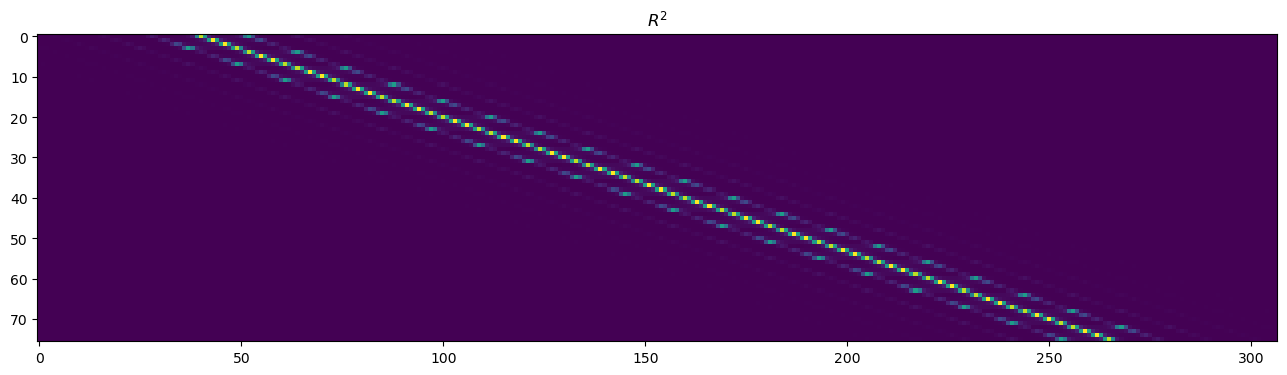

In [156]:
R = np.load('R.npy')
plt.figure(figsize=(16,10))
plt.imshow(np.abs(R)**2)
plt.title('$R^2$')
plt.show()

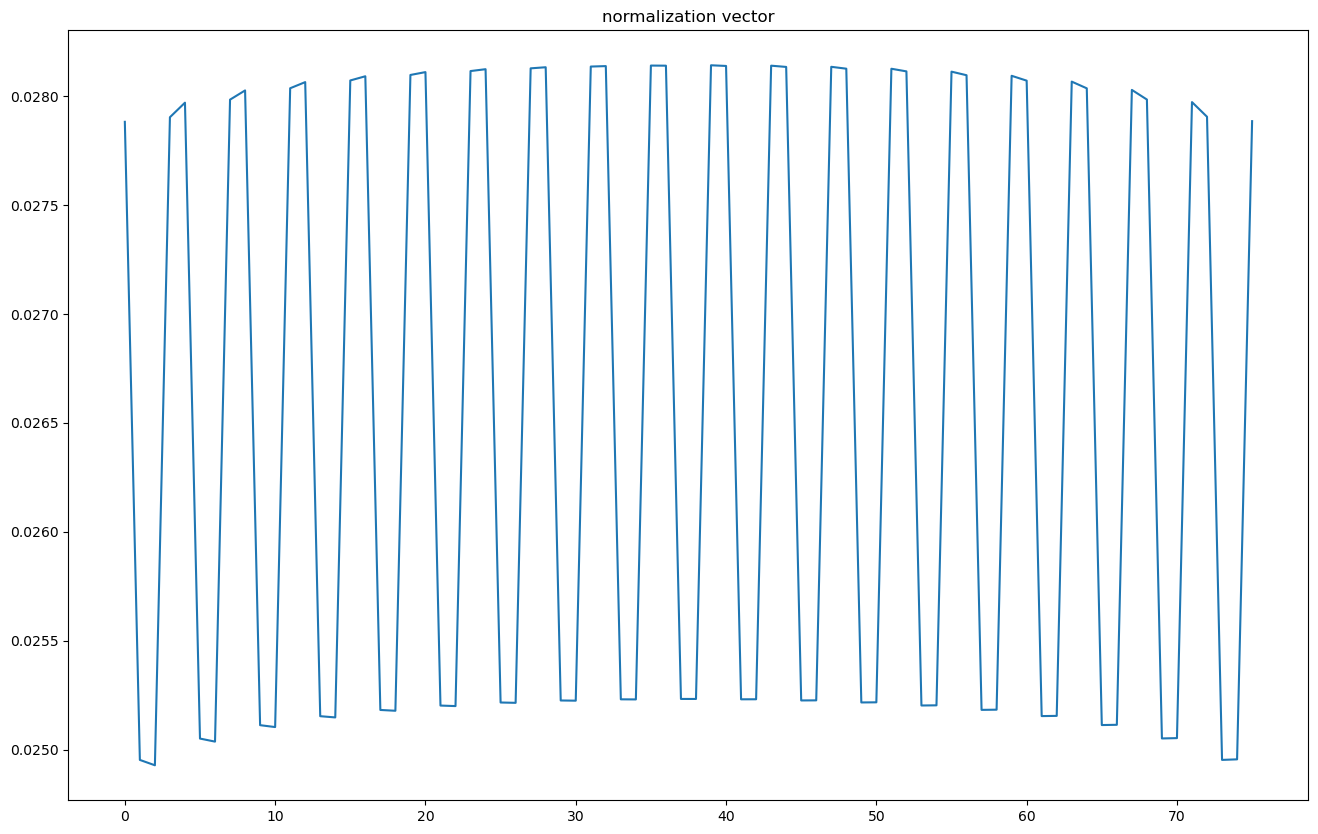

In [157]:
norm = np.load('norm.npy')
plt.figure(figsize=(16,10))
plt.plot(norm)
plt.title('normalization vector')
plt.show()

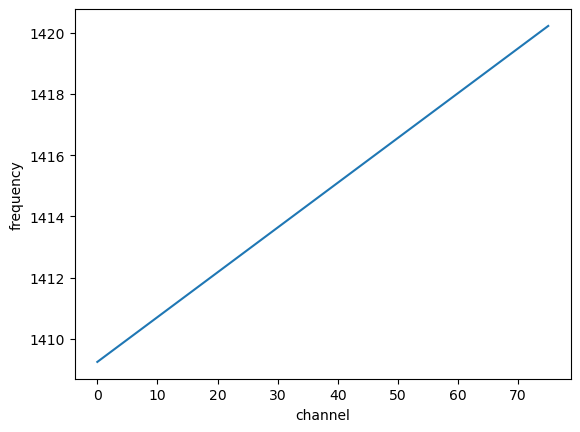

In [158]:
freqs = np.load('freqs_matrix.npy')
plt.plot(freqs)
plt.xlabel('channel')
plt.ylabel('frequency')
plt.show()

# Up-channelize a map

In [159]:
import channelization_functions as cf
from savetools import make_map

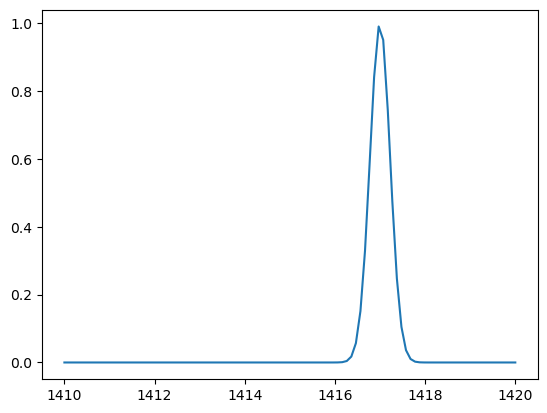

In [160]:
f = np.linspace(fmax, fmin, 100)
profile = np.exp(-(f-1417)**2/.1)

plt.plot(f, profile)
plt.show()

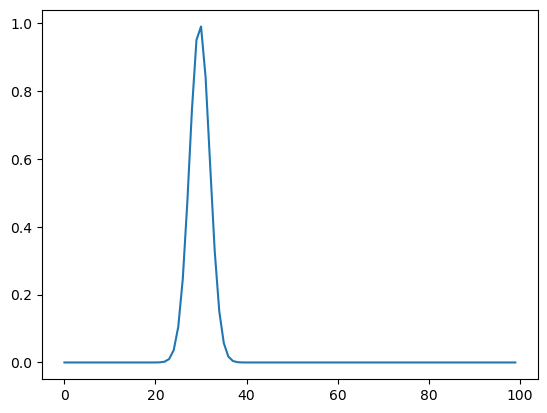

0.9908592961125675
8.194012623990515e-40
3.1715616362806283e-37
1.0009841467156978e-34
2.5760765182194225e-32
5.4058978460570725e-30
9.250270370583471e-28
1.2906798645121885e-25
1.468453366279917e-23
1.3623205246335191e-21
1.0305663468377754e-19
6.356969524138094e-18
3.1974356917398063e-16
1.3113874520619163e-14
4.3856881294232296e-13
1.1959746737599494e-11
2.6594004439367967e-10
4.821953377968101e-09
7.12918349981299e-08
8.594766763758552e-07


In [182]:
input_map = make_map(fstate,
         profile,
         8,
         'full',
         ra=20,
         dec=45,
         write=True,
         filename='input_map2.h5')

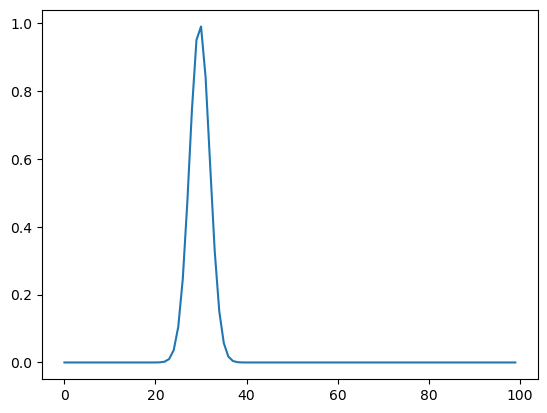

In [176]:
plt.plot(profile)

In [172]:
ff = h5py.File('input_map2.h5')
input_map = ff['map'][:]
farray = ff['index_map']['freq']
frequencies = [fi[0] for fi in farray]
ff.close()

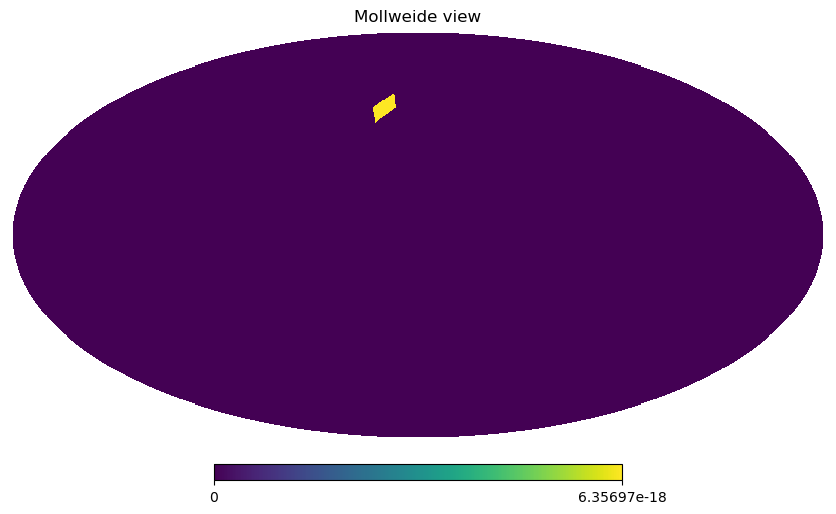

In [175]:
hp.mollview(input_map[10,0,:])

In [169]:
np.argmax(input_map[10,0,:])

1746

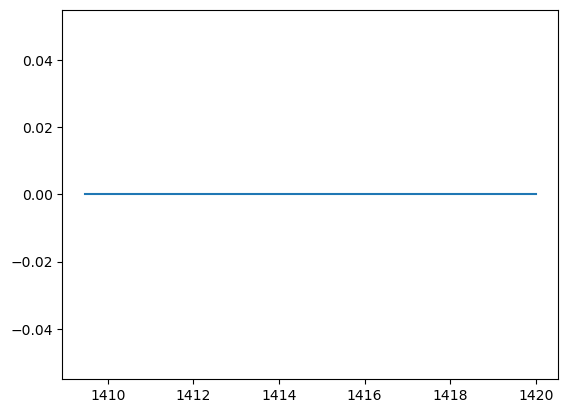

In [170]:
plt.plot(frequencies, input_map[:,0,1746])
plt.show()

In [114]:
input_map.shape

(10, 4, 12288)

In [107]:
upchan.upchannelize(nside=64)

Writing file ./full_input.h5 containing the input maps ./foregrounds.h5.
